In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyogrio
from tqdm import tqdm

geopackage_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/lpf_egms_data.gpkg"
# sql_query = "SELECT * FROM data_all WHERE is_rga = FALSE"
sql_query = "SELECT * FROM data_rga"
# n = pyogrio.read_dataframe(geopackage_path, sql="SELECT COUNT(pid) FROM data WHERE is_rga = FALSE")
# n = n.iloc[0,0]

In [2]:
df = pyogrio.read_dataframe(geopackage_path, sql=sql_query, max_features=1)
df.columns

Index(['Date', 'Value', 'Type', 'Burst ID', 'pid', 'year', 'month', 'time_gap',
       'season', 'value_diff', 'is_rga', 'value_type', 'value_diff_abs',
       'month_trough', 'month_peak', 'gap_insar_swi_trough',
       'gap_insar_swi_peak', 'is_swi_close', 'NIVEAU', 'value_diff_abs_denorm',
       'median_value_diff_abs_2016_2021',
       'median_value_diff_abs_denorm_2016_2021', 'gap_insar_swi_trough_days',
       'gap_insar_swi_peak_days', 'amp_diff_to_median', 'geometry'],
      dtype='object')

In [3]:
sql_query = "SELECT Type, year, value_diff_abs_denorm, gap_insar_swi_trough_days, gap_insar_swi_peak_days, is_rga, NIVEAU FROM data_all WHERE is_rga = FALSE"
# sql_query = "SELECT Type, year, value_diff_abs_denorm, gap_insar_swi_trough_days, gap_insar_swi_peak_days, is_rga, NIVEAU FROM data_rga"
gdf = pyogrio.read_dataframe(geopackage_path, sql=sql_query)

In [4]:
gdf.head(100)

,Type,year,value_diff_abs_denorm,gap_insar_swi_trough_days,gap_insar_swi_peak_days,is_rga,NIVEAU
0,Trough,2016,NaN,-234.0,NaN,False,1.0
1,Peak,2016,0.499754,NaN,45.0,False,1.0
2,Trough,2016,0.095878,-84.0,NaN,False,1.0
3,Peak,2017,2.129681,NaN,-43.0,False,1.0
4,Trough,2017,2.417315,-65.0,NaN,False,1.0
...,...,...,...,...,...,...,...
95,Trough,2018,0.729692,-232.0,NaN,False,1.0
96,Peak,2018,2.148348,NaN,204.0,False,1.0
97,Trough,2019,1.601927,-189.0,NaN,False,1.0
98,Peak,2019,2.591253,NaN,-88.0,False,1.0


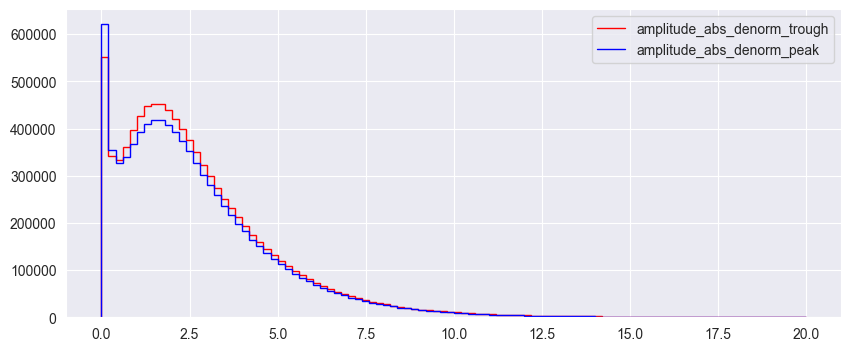

In [5]:
plt.figure(figsize=(10,4))

legend = ['amplitude_abs_denorm_trough', 'amplitude_abs_denorm_peak']
counts, bins = np.histogram(gdf.loc[gdf['Type']=='Trough', 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20))
plt.stairs(counts, bins, color='red')

# legend = ['amplitude_abs_denorm_peak']
counts, bins = np.histogram(gdf.loc[gdf['Type']=='Peak', 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20))
plt.stairs(counts, bins, color='blue')

plt.legend(legend)
plt.show()

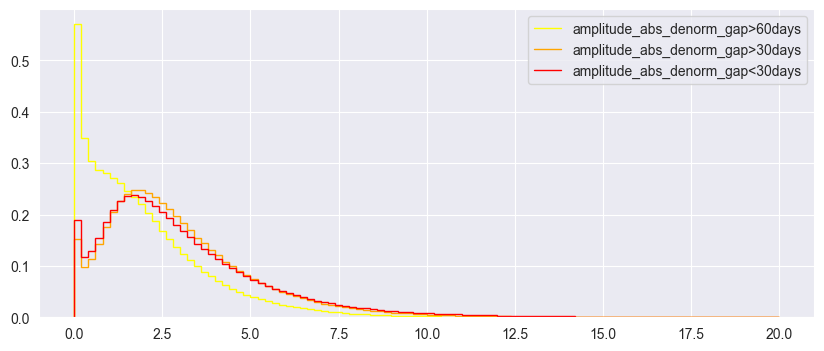

In [12]:
plt.figure(figsize=(10,4))

legend = ['amplitude_abs_denorm_gap>60days', 'amplitude_abs_denorm_gap>30days' , 'amplitude_abs_denorm_gap<30days']

filter_gap = (gdf['Type']=='Trough') & (abs(gdf['gap_insar_swi_trough_days'])>60)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='yellow')

filter_gap = (gdf['Type']=='Trough') & (abs(gdf['gap_insar_swi_trough_days'])<=60) & (abs(gdf['gap_insar_swi_trough_days'])>30)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='orange')

filter_gap = (gdf['Type']=='Trough') & (abs(gdf['gap_insar_swi_trough_days'])<=30)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='red')

plt.legend(legend)
plt.show()

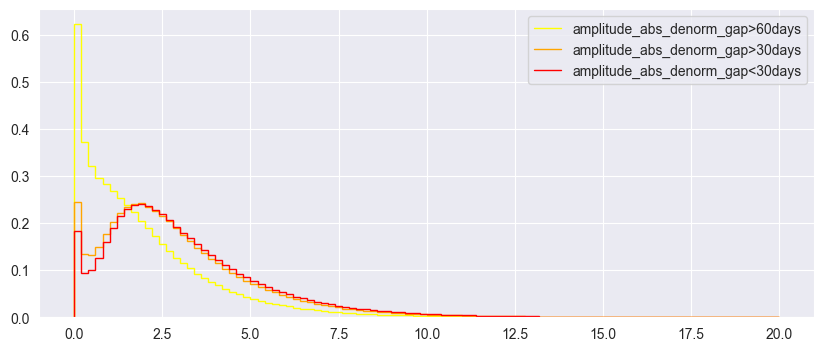

In [13]:
plt.figure(figsize=(10,4))

legend = ['amplitude_abs_denorm_gap>60days', 'amplitude_abs_denorm_gap>30days' , 'amplitude_abs_denorm_gap<30days']

filter_gap = (gdf['Type']=='Peak') & (abs(gdf['gap_insar_swi_peak_days'])>60)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='yellow')

filter_gap = (gdf['Type']=='Peak') & (abs(gdf['gap_insar_swi_peak_days'])<=60) & (abs(gdf['gap_insar_swi_peak_days'])>30)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='orange')

filter_gap = (gdf['Type']=='Peak') & (abs(gdf['gap_insar_swi_peak_days'])<=30)
counts, bins = np.histogram(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=100, range=(0,20), density=True)
plt.stairs(counts, bins, color='red')

plt.legend(legend)
plt.show()

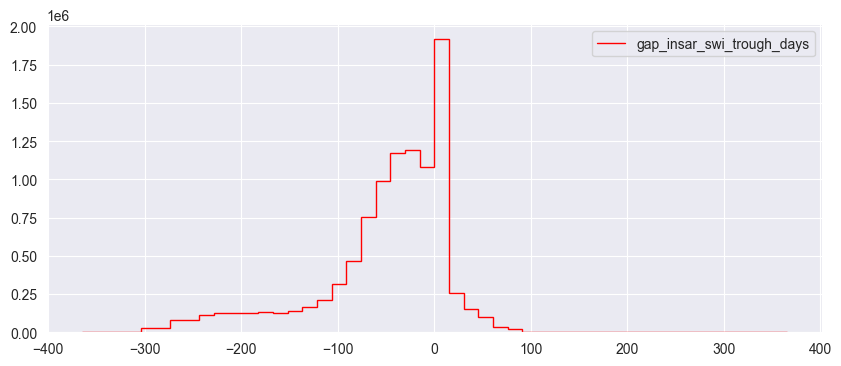

In [14]:
legend = ['gap_insar_swi_trough_days']
counts, bins = np.histogram(gdf['gap_insar_swi_trough_days'].dropna(), bins=48, range=(-365,365))

plt.figure(figsize=(10,4))
plt.stairs(counts, bins, color='red')
plt.legend(legend)
plt.show()

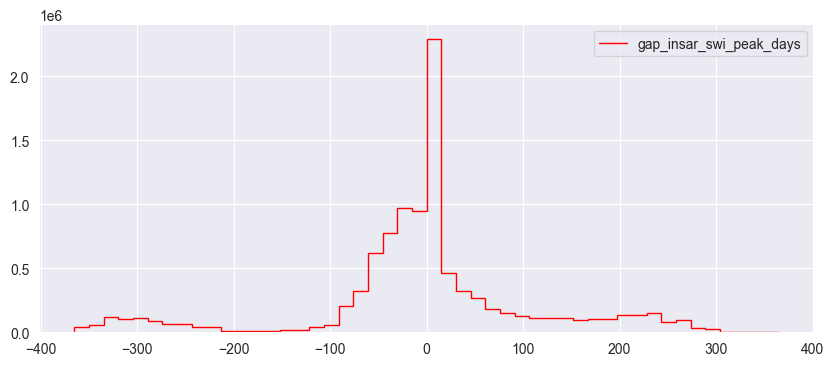

In [15]:
legend = ['gap_insar_swi_peak_days']
counts, bins = np.histogram(gdf['gap_insar_swi_peak_days'].dropna(), bins=48, range=(-365,365))

plt.figure(figsize=(10,4))
plt.stairs(counts, bins, color='red')
plt.legend(legend)
plt.show()

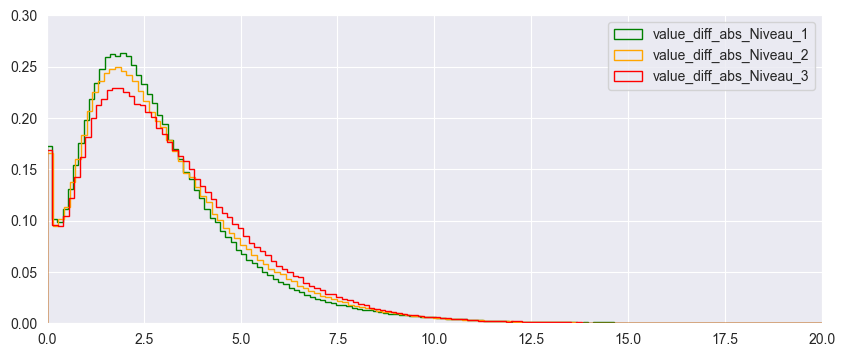

In [33]:
color = {1: 'green', 2: 'orange', 3: 'red'}
plt.figure(figsize=(10,4))

for i in [1,2,3]:
    filter_gap = (gdf['NIVEAU'] == i) & (gdf['Type']=='Trough') & (abs(gdf['gap_insar_swi_trough_days'])<=60) & (abs(gdf['gap_insar_swi_trough_days'])>30)
    legend = 'value_diff_abs_Niveau_' + str(i)
    plt.hist(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=200, density=True, histtype='step', color=color[i], label=legend)
    
plt.legend()
plt.xlim(0,20)
plt.ylim(0,0.3)
plt.show()

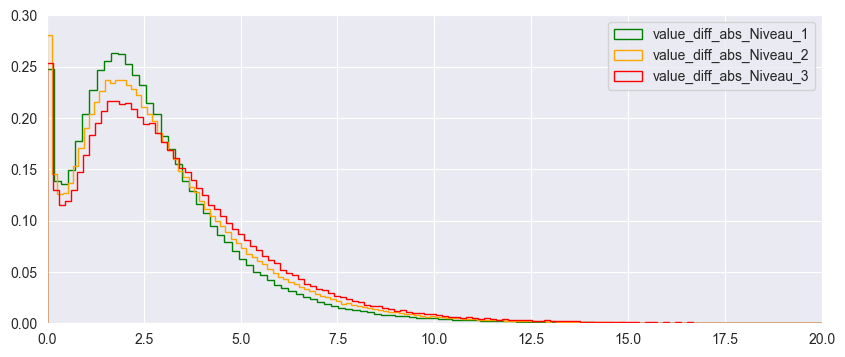

In [32]:
color = {1: 'green', 2: 'orange', 3: 'red'}
plt.figure(figsize=(10,4))

for i in [1,2,3]:
    filter_gap = (gdf['NIVEAU'] == i) & (gdf['Type']=='Peak') & (abs(gdf['gap_insar_swi_peak_days'])>30) & (abs(gdf['gap_insar_swi_peak_days'])<=60)
    legend = 'value_diff_abs_Niveau_' + str(i)
    plt.hist(gdf.loc[filter_gap, 'value_diff_abs_denorm'].dropna(), bins=200, density=True, histtype='step', color=color[i], label=legend)

plt.legend()
plt.xlim(0,20)
plt.ylim(0,0.3)
plt.show()

In [ ]:
peak_filter = (df['gap_insar_swi_peak'] >= -1) & (df['gap_insar_swi_peak'] <= 1)
trough_filter = (df['gap_insar_swi_trough'] >= -1) & (df['gap_insar_swi_trough'] <= 1)

df_rga_peak = df[peak_filter]
df_rga_trough = df[trough_filter]
df_rga_filtered = df[~peak_filter & ~trough_filter]
print(len(df_rga_peak) + len(df_rga_trough) + len(df_rga_filtered))